### web crawling
- 1. requests : json : 동적페이지 (URL 변경 없이 데이터를 수정 및 추가)
- 2. requests : html : 정적페이지 (URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser : 1, 2번 방법을 사용하지 못할 때 사용 (다만 속도가 조금 느림)

### 1. 네이버 주식 데이터 크롤링
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD 환율 데이터 수집
- 그래프, 상관계수 확인

### 크롤링 절차
- 1. 웹 서비스 분석 : URL 확인
- 2. requests, response : json 데이터(문자열)를 얻기
- 3. json 데이터(문자열) : dict(파싱) -> 데이터 프레임으로 형변환

In [1]:
import requests

In [2]:
# 1. 웹 서비스 분석 : URL 찾기
code, page_size, page = "KOSPI", 20, 1

url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size, page)

print(url)

https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1


In [3]:
# 2. request, response : JSON(str)
response = requests.get(url)
response

<Response [200]>

In [4]:
type(response.text)

str

In [5]:
# 3. JSON(str) -> JSON(dict) -> DF
data = response.json()["result"]["siseList"]
kospi_df = pd.DataFrame(data)
kospi_df.head()

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSPI,20200901,2349.55,23.38,1.01,2340.19,2355.90,2331.23
1,KOSPI,20200831,2326.17,-27.63,-1.17,2377.09,2381.50,2326.06
2,KOSPI,20200828,2353.80,9.35,0.40,2362.22,2379.26,2345.28
3,KOSPI,20200827,2344.45,-24.87,-1.05,2371.95,2373.36,2344.38
4,KOSPI,20200826,2369.32,2.59,0.11,2367.74,2374.68,2336.98


In [6]:
# 함수로 만들기
def get_stock_data(code, page_size=20, page=1):
    url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    data = response.json()["result"]["siseList"]
    return pd.DataFrame(data)

In [7]:
kospi_df = get_stock_data("KOSPI", 100)
kosdaq_df = get_stock_data("KOSDAQ", 100)

### USD 수집

In [8]:
# 1. 웹페이지 분석 : URL

In [24]:
code, page_size, page = "FX_USDKRW", 100, 1

url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?\
marketIndexCd={}&pageSize={}&page={}".format(code, page_size, page)

print(url)

https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=100&page=1


In [25]:
# 2. requests, resposne : JSON(str)

In [26]:
# 쿠키 데이터 추가해서 요청

params = {
    'cookie': 'NNB=ZZIK6AX4QM5V6; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; nx_ssl=2; nid_inf=-1356269196; NID_JKL=Drk1opENWd/QnCMw/UJikAc0KZ8ty1h6MQIMA3vPGxc=; NID_AUT=fNBhFgQd11TS/XQyie+5yJUa1BjoQez3Gq58TgQ3hTbev5EeHPvCWeXY/G+LQKz5; NV_WETR_LAST_ACCESS_RGN_M="MDk3NDAxMDM="; NV_WETR_LOCATION_RGN_M="MDk3NDAxMDM="; ASID=0e20c3b9000001744440812600000062; EXT_V1=05119019-a53b-4d79-b320-9ee1a34605d0; NID_SES=AAABh+Pb2NdvaX8bQaLaWRlTwKSHcSt+qoGTDMo/RcaPJiExbW5SuWig4YDvbW3/Gnth98n5IIFpDqFKB3M9e4yYnWbFh/tV1xPmeBBmT0BSGZwTdf7mCEF4wATdcnWfD0XLT1ignNI09WipdHIJqxWG6mFvjKk/ycnim7OojN7c3s3ifWLtb3cZHe1Wc6+isMlhvGlDtCId2lX5GscRKSrT1KsD1+7K4sLr/5mfbQYYYWJkdozdy/ebhYP9zLSuaf1YUehu4yOOxEOWVow68AcBcTV7mXfofC2PI0qBNZ39y2+IQHPIr0K6QrNJm680YYKSdL1m1tjNq4WWEuo/sA+VfrxPb1TIpGEpc7HLNXQREcBErqJMwLzfL/M1Yk2h9nqXw1B7c5fifeYKbATlHryNzh9x1KLD4BUwxaqeCbtgaeHIj1ee77FbtOWKvcpL3eyfkUoFtTn6gtYfScPcmFX1KHhh/d4ZFKcmVIfT/M67UbjaLhhbFYcWvXQjpkyDUtjSHQLropO9WEpXQdU147aIV7U=; my_layer_account_close_popup=1; my_last_menu_id=-2; JSESSIONID=3F9D594A36D339AF3375EBA8741B41DD; BMR=; XSRF-TOKEN=4fb6df2e-5cc5-4794-9d17-0dcc5263a257'
}

response = requests.get(url, headers=params)
response

<Response [200]>

In [27]:
response.text

'{"result":{"marketIndexDay":[{"dt":"20200901","nv":1183.2,"cv":-3.8,"cr":-0.32,"cbv":1203.9,"csv":1162.5,"sv":1194.7,"rv":1171.7},{"dt":"20200831","nv":1187.0,"cv":4.0,"cr":0.34,"cbv":1207.77,"csv":1166.23,"sv":1198.6,"rv":1175.4},{"dt":"20200828","nv":1183.0,"cv":-2.8,"cr":-0.24,"cbv":1203.7,"csv":1162.3,"sv":1194.5,"rv":1171.5},{"dt":"20200827","nv":1185.8,"cv":-1.2,"cr":-0.1,"cbv":1206.55,"csv":1165.05,"sv":1197.4,"rv":1174.2},{"dt":"20200826","nv":1187.0,"cv":0.0,"cr":0.0,"cbv":1207.77,"csv":1166.23,"sv":1198.6,"rv":1175.4},{"dt":"20200825","nv":1187.0,"cv":-1.0,"cr":-0.08,"cbv":1207.77,"csv":1166.23,"sv":1198.6,"rv":1175.4},{"dt":"20200824","nv":1188.0,"cv":-1.5,"cr":-0.13,"cbv":1208.79,"csv":1167.21,"sv":1199.6,"rv":1176.4},{"dt":"20200821","nv":1189.5,"cv":1.0,"cr":0.08,"cbv":1210.31,"csv":1168.69,"sv":1201.1,"rv":1177.9},{"dt":"20200820","nv":1188.5,"cv":10.5,"cr":0.89,"cbv":1209.29,"csv":1167.71,"sv":1200.1,"rv":1176.9},{"dt":"20200819","nv":1178.0,"cv":-6.5,"cr":-0.55,"cbv":

In [ ]:
# 3. JSON(str) -> JSON(dict) -> DF

In [28]:
data = response.json()['result']['marketIndexDay']
usd_df = pd.DataFrame(data)
usd_df.head()

,dt,nv,cv,cr,cbv,csv,sv,rv
0,20200901,1183.2,-3.8,-0.32,1203.90,1162.50,1194.7,1171.7
1,20200831,1187.0,4.0,0.34,1207.77,1166.23,1198.6,1175.4
2,20200828,1183.0,-2.8,-0.24,1203.70,1162.30,1194.5,1171.5
3,20200827,1185.8,-1.2,-0.10,1206.55,1165.05,1197.4,1174.2
4,20200826,1187.0,0.0,0.00,1207.77,1166.23,1198.6,1175.4


In [32]:
print(usd_df["dt"].values)

['20200901' '20200831' '20200828' '20200827' '20200826' '20200825'
 '20200824' '20200821' '20200820' '20200819' '20200818' '20200814'
 '20200813' '20200812' '20200811' '20200810' '20200807' '20200806'
 '20200805' '20200804' '20200803' '20200731' '20200730' '20200729'
 '20200728' '20200727' '20200724' '20200723' '20200722' '20200721'
 '20200720' '20200717' '20200716' '20200715' '20200714' '20200713'
 '20200710' '20200709' '20200708' '20200707' '20200706' '20200703'
 '20200702' '20200701' '20200630' '20200629' '20200626' '20200625'
 '20200624' '20200623' '20200622' '20200619' '20200618' '20200617'
 '20200616' '20200615' '20200612' '20200611' '20200610' '20200609'
 '20200608' '20200605' '20200604' '20200603' '20200602' '20200601'
 '20200529' '20200528' '20200527' '20200526' '20200525' '20200522'
 '20200521' '20200520' '20200519' '20200518' '20200515' '20200514'
 '20200513' '20200512' '20200511' '20200508' '20200507' '20200506'
 '20200504' '20200429' '20200428' '20200427' '20200424' '20200

In [33]:
print(kospi_df["dt"].values)

['20200901' '20200831' '20200828' '20200827' '20200826' '20200825'
 '20200824' '20200821' '20200820' '20200819' '20200818' '20200814'
 '20200813' '20200812' '20200811' '20200810' '20200807' '20200806'
 '20200805' '20200804' '20200803' '20200731' '20200730' '20200729'
 '20200728' '20200727' '20200724' '20200723' '20200722' '20200721'
 '20200720' '20200717' '20200716' '20200715' '20200714' '20200713'
 '20200710' '20200709' '20200708' '20200707' '20200706' '20200703'
 '20200702' '20200701' '20200630' '20200629' '20200626' '20200625'
 '20200624' '20200623' '20200622' '20200619' '20200618' '20200617'
 '20200616' '20200615' '20200612' '20200611' '20200610' '20200609'
 '20200608' '20200605' '20200604' '20200603' '20200602' '20200601'
 '20200529' '20200528' '20200527' '20200526' '20200525' '20200522'
 '20200521' '20200520' '20200519' '20200518' '20200515' '20200514'
 '20200513' '20200512' '20200511' '20200508' '20200507' '20200506'
 '20200504' '20200429' '20200428' '20200427' '20200424' '20200

In [34]:
print(kosdaq_df["dt"].values)

['20200901' '20200831' '20200828' '20200827' '20200826' '20200825'
 '20200824' '20200821' '20200820' '20200819' '20200818' '20200814'
 '20200813' '20200812' '20200811' '20200810' '20200807' '20200806'
 '20200805' '20200804' '20200803' '20200731' '20200730' '20200729'
 '20200728' '20200727' '20200724' '20200723' '20200722' '20200721'
 '20200720' '20200717' '20200716' '20200715' '20200714' '20200713'
 '20200710' '20200709' '20200708' '20200707' '20200706' '20200703'
 '20200702' '20200701' '20200630' '20200629' '20200626' '20200625'
 '20200624' '20200623' '20200622' '20200619' '20200618' '20200617'
 '20200616' '20200615' '20200612' '20200611' '20200610' '20200609'
 '20200608' '20200605' '20200604' '20200603' '20200602' '20200601'
 '20200529' '20200528' '20200527' '20200526' '20200525' '20200522'
 '20200521' '20200520' '20200519' '20200518' '20200515' '20200514'
 '20200513' '20200512' '20200511' '20200508' '20200507' '20200506'
 '20200504' '20200429' '20200428' '20200427' '20200424' '20200

In [35]:
# 데이터 합치기

In [39]:
merge_df_1 = pd.merge(kospi_df, kosdaq_df, left_on="dt", right_on="dt")
merge_df_1 = merge_df_1.rename(columns = {"ncv_x": "ncv_kospi", "ncv_y": "ncv_kosdaq"})
merge_df_1 = merge_df_1[["dt", "ncv_kospi", "ncv_kosdaq"]]
merge_df_1.tail()

,dt,ncv_kospi,ncv_kosdaq
95,20200414,1857.08,610.29
96,20200413,1825.76,596.71
97,20200410,1860.70,611.26
98,20200409,1836.21,615.95
99,20200408,1807.14,607.37


In [40]:
merge_df = pd.merge(merge_df_1, usd_df)[["dt", "ncv_kospi", "ncv_kosdaq", "nv"]]
merge_df.tail()

,dt,ncv_kospi,ncv_kosdaq,nv
95,20200414,1857.08,610.29,1216.0
96,20200413,1825.76,596.71,1217.5
97,20200410,1860.70,611.26,1212.5
98,20200409,1836.21,615.95,1219.0
99,20200408,1807.14,607.37,1220.0


### 그래프 그리기

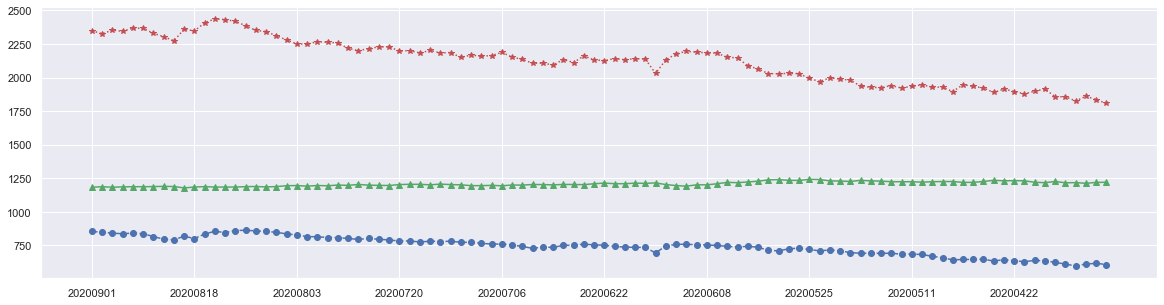

In [45]:
plt.figure(figsize=(20,5))
plt.plot(merge_df["dt"], merge_df["ncv_kospi"], "r*:", label="kospi")
plt.plot(merge_df["dt"], merge_df["ncv_kosdaq"], "bo--", label="kosdaq")
plt.plot(merge_df["dt"], merge_df["nv"], "g^-", label="usd")

# xtick이 항상 10개 출력 되도록
step = len(merge_df) // 10
plt.xticks(merge_df[::step]["dt"])

plt.show()

### 정규화 : Normalisation
- z = (x - min(x)) / (max(x) - min(x))

In [47]:
from sklearn import preprocessing

In [50]:
preprocessing.minmax_scale(merge_df["ncv_kospi"])[:10]

array([0.8604356 , 0.82334745, 0.86717746, 0.85234537, 0.89179714,
       0.88768857, 0.82915338, 0.78911468, 0.74093815, 0.87786926])

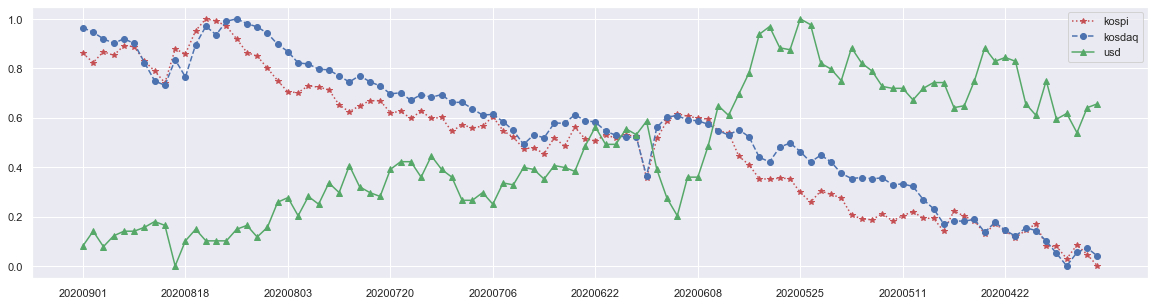

In [54]:
plt.figure(figsize=(20,5))
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_kospi"]), "r*:", label="kospi")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_kosdaq"]), "bo--", label="kosdaq")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["nv"]), "g^-", label="usd")

# label data
plt.legend(loc=0)

# xtick이 항상 10개 출력 되도록
step = len(merge_df) // 10
plt.xticks(merge_df[::step]["dt"])

plt.show()

In [55]:
# 상관계수

In [57]:
np.corrcoef(merge_df["ncv_kospi"], merge_df["ncv_kosdaq"])[0, 1]

0.9724477779676187

In [58]:
np.corrcoef(merge_df["ncv_kospi"], merge_df["nv"])[0, 1]

-0.8715259839486327

In [59]:
np.corrcoef(merge_df["ncv_kosdaq"], merge_df["nv"])[0, 1]

-0.8068396340292787